In [1]:
import os
from Transformer_model import *

2025-06-05 20:05:46.614246: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-05 20:05:46.660767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749146746.682145 2397204 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749146746.689373 2397204 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749146746.722361 2397204 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
N_drive = '/mnt/n/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ'
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
dataset_folder = os.path.join(N_drive, 'ML_datasets')
tdms_files = ['Data_diffent_process_params_2025_06_03.tdms','Data_processes_2025_06_03.tdms']


I0000 00:00:1749040301.746139 2003124 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13709 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1749040357.696953 2003364 service.cc:152] XLA service 0x7970e800adb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749040357.696990 2003364 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-04 14:32:37.832811: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749040358.494006 2003364 cuda_dnn.cc:529] Loaded cuDNN version 90300


 37/700 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.3790

I0000 00:00:1749040361.439601 2003364 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3726

2025-06-04 14:32:48.613941: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27', 12 bytes spill stores, 12 bytes spill loads



700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.3702 - val_loss: 1.0951
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1523 - val_loss: 1.0523
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1669 - val_loss: 1.0321
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1021 - val_loss: 1.0480
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0900 - val_loss: 1.0713
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1198 - val_loss: 1.1052
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1040 - val_loss: 1.0958
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1009 - val_loss: 1.0816
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1256 - val_loss: 1.0837
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0689 - val_loss: 1.0594
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0819 - val_loss: 1.0266
Epoch 12/100
700/700 ━━━━━━━━━━

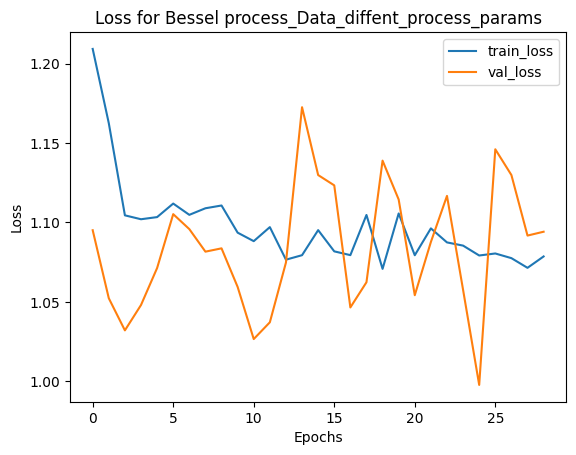

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.4421 - val_loss: 1.1167
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1142 - val_loss: 1.0477
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0758 - val_loss: 1.0971
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0903 - val_loss: 1.0855
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0547 - val_loss: 1.0763
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0725 - val_loss: 1.0778
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0754 - val_loss: 1.0645
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0604 - val_loss: 1.0647
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0678 - val_loss: 1.0436
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0471 - val_loss: 1.0558
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0502 - val_loss: 1.0504
Epoch 12/100
700/70

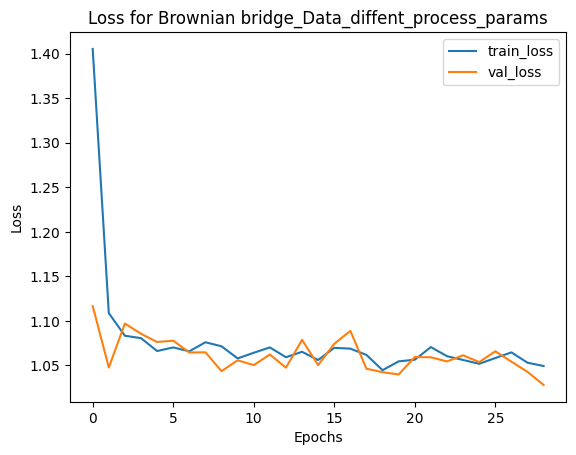

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1.9199 - val_loss: 1.0673
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1021 - val_loss: 1.1069
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0776 - val_loss: 1.0169
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0782 - val_loss: 1.0873
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0467 - val_loss: 1.0731
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0813 - val_loss: 1.0638
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0463 - val_loss: 1.0584
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0598 - val_loss: 1.0315
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0391 - val_loss: 1.0473
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0538 - val_loss: 1.0372
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0589 - val_loss: 1.0542
Epoch 12/100
700/70

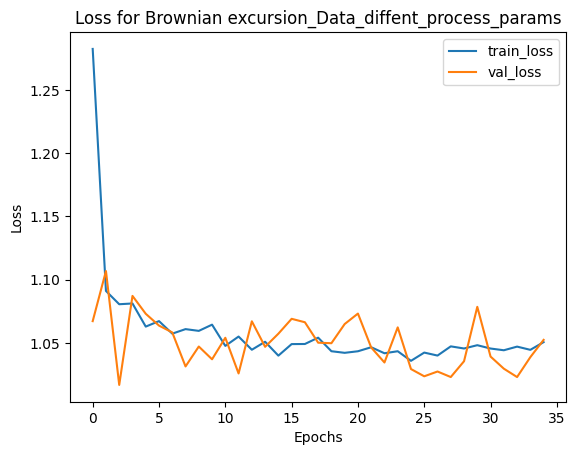

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 2.2816 - val_loss: 1.2027
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1671 - val_loss: 1.1554
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1344 - val_loss: 1.1867
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1220 - val_loss: 1.1466
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1371 - val_loss: 1.0988
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1318 - val_loss: 1.1165
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1114 - val_loss: 1.1287
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1133 - val_loss: 1.1080
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1084 - val_loss: 1.1315
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1053 - val_loss: 1.1002
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1035 - val_loss: 1.1175
Epoch 12/100
700/70

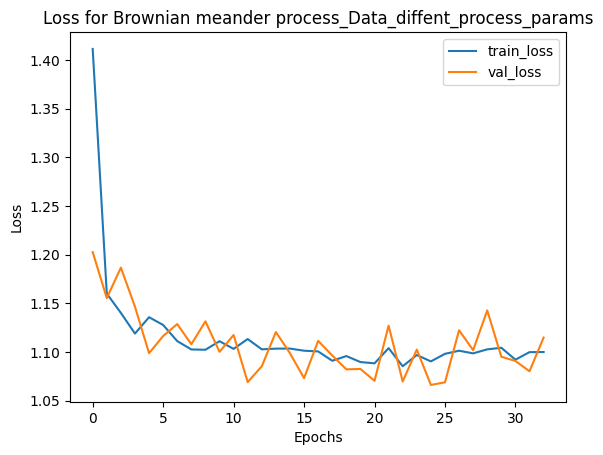

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.7613 - val_loss: 1.4073
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2317 - val_loss: 1.1322
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1246 - val_loss: 1.2222
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1367 - val_loss: 1.1955
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1062 - val_loss: 1.1051
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1047 - val_loss: 1.1505
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1342 - val_loss: 1.0840
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1165 - val_loss: 1.1380
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0968 - val_loss: 1.0890
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1135 - val_loss: 1.1000
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1083 - val_loss: 1.1547
Epoch 12/100
700/70

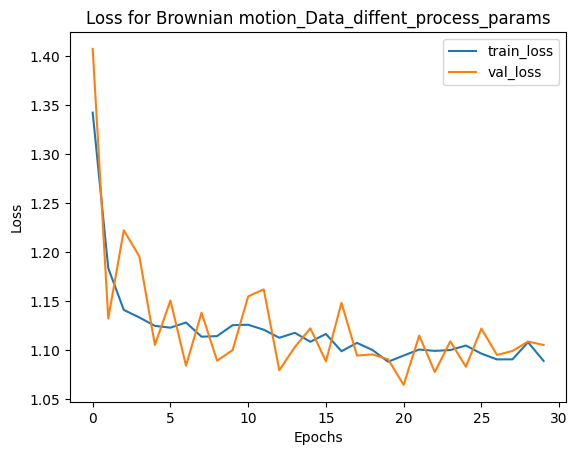

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 3.1965 - val_loss: 1.8056
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.8765 - val_loss: 1.8784
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.7909 - val_loss: 1.7205
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.8077 - val_loss: 1.7243
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.8020 - val_loss: 1.8005
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7710 - val_loss: 1.6817
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7369 - val_loss: 1.8493
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7813 - val_loss: 1.8846
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.8419 - val_loss: 1.7699
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.7331 - val_loss: 1.7457
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7681 - val_loss: 1.6199
Epoch 12/100
700/70

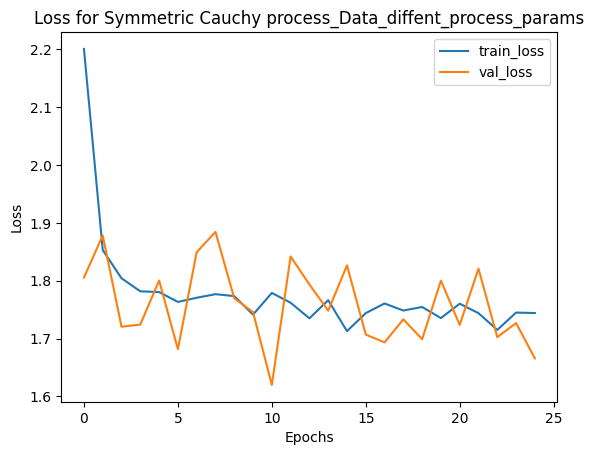

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3.8775 - val_loss: 1.4157
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4124 - val_loss: 1.3896
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3661 - val_loss: 1.3184
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3950 - val_loss: 1.3128
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3522 - val_loss: 1.3743
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3434 - val_loss: 1.3760
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3417 - val_loss: 1.3400
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3709 - val_loss: 1.2857
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3516 - val_loss: 1.3175
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3495 - val_loss: 1.3194
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3102 - val_loss: 1.3293
Epoch 12/100
700/70

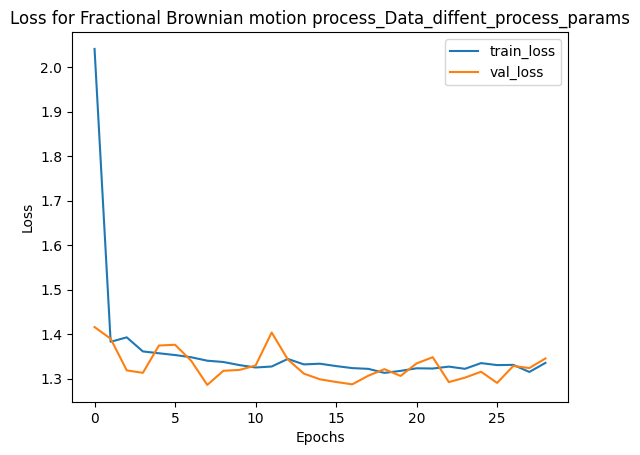

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 2.1750 - val_loss: 1.6646
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6579 - val_loss: 1.6482
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6596 - val_loss: 1.6737
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.6151 - val_loss: 1.7287
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6411 - val_loss: 1.5732
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.6126 - val_loss: 1.6283
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6292 - val_loss: 1.5966
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6670 - val_loss: 1.6181
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5932 - val_loss: 1.6237
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5787 - val_loss: 1.6039
Epoch 11/100
688/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5982

2025-06-04 15:18:41.674305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 889 of 1000
2025-06-04 15:19:27.756301: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 905 of 1000
2025-06-04 15:19:58.638237: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 932 of 1000
2025-06-04 15:20:12.138253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 982 of 1000
2025-06-04 15:20:25.147227: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 999 of 1000
2025-06-04 15:20:27.073745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


700/700 ━━━━━━━━━━━━━━━━━━━━ 134s 186ms/step - loss: 1.5983 - val_loss: 1.6043
Epoch 12/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5522 - val_loss: 1.6051
Epoch 13/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5931 - val_loss: 1.5597
Epoch 14/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6040 - val_loss: 1.6264
Epoch 15/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.6426 - val_loss: 1.6436
Epoch 16/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5838 - val_loss: 1.5834
Epoch 17/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5991 - val_loss: 1.6337
Epoch 18/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5685 - val_loss: 1.6422
Epoch 19/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5949 - val_loss: 1.6265
Epoch 20/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5777 - val_loss: 1.6206
Epoch 21/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5861 - val_loss: 1.6157
Epoch 22/100
700/700 

2025-06-04 15:24:41.439394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 649 of 1000
2025-06-04 15:24:51.990157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 656 of 1000
2025-06-04 15:25:03.119851: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 664 of 1000
2025-06-04 15:25:21.298612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 665 of 1000
2025-06-04 15:26:01.102723: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 744 of 1000
2025-06-04 15:26:54.819198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a 

700/700 ━━━━━━━━━━━━━━━━━━━━ 12377s 18s/step - loss: 1.5797 - val_loss: 1.5918
Epoch 27/100


2025-06-04 18:50:55.060602: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 392 of 1000
2025-06-04 18:51:09.457090: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:86: Filling up shuffle buffer (this may take a while): 393 of 1000


  2/700 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - loss: 1.1590   

2025-06-04 18:51:12.154675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


700/700 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 1.5679 - val_loss: 1.5797
Epoch 28/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.6001 - val_loss: 1.6028
Epoch 29/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5772 - val_loss: 1.6243
Epoch 30/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5586 - val_loss: 1.5943
Epoch 31/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5686 - val_loss: 1.5636
Epoch 32/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5832 - val_loss: 1.6347
Epoch 33/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6138 - val_loss: 1.5760
Epoch 34/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5622 - val_loss: 1.5887
Epoch 35/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6173 - val_loss: 1.5870
Epoch 36/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 1.5786 - val_loss: 1.5788
Epoch 37/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5806 - val_loss: 1.6240
Epoch 38/100
700/700 ━━

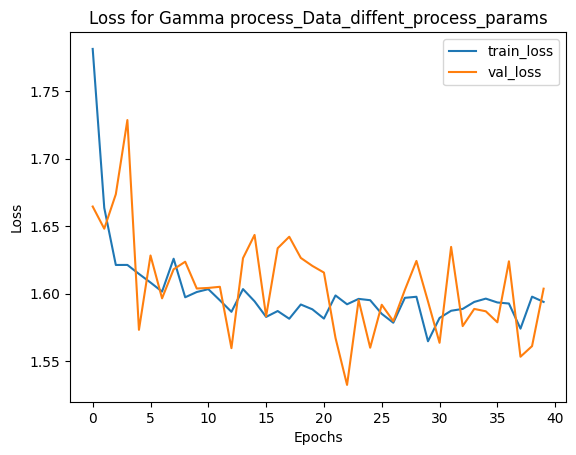

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 2.0334 - val_loss: 1.2608
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2176 - val_loss: 1.1931
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2051 - val_loss: 1.1821
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1876 - val_loss: 1.2120
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1698 - val_loss: 1.1407
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2024 - val_loss: 1.1603
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1592 - val_loss: 1.1646
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1476 - val_loss: 1.1648
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1424 - val_loss: 1.1813
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1620 - val_loss: 1.1820
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1714 - val_loss: 1.1799
Epoch 12/100
700/70

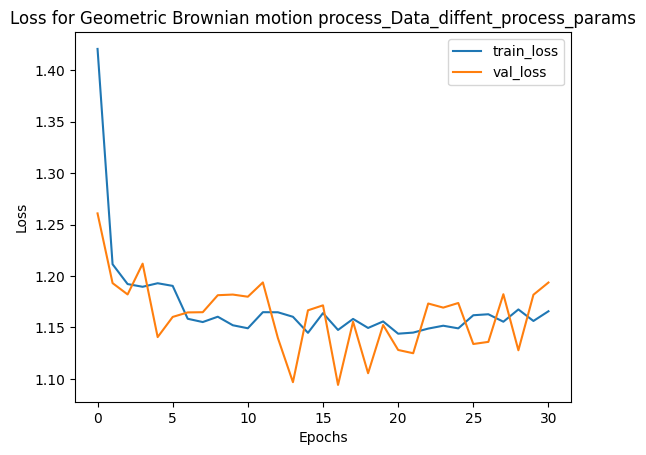

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 2.9109 - val_loss: 1.8392
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.7388 - val_loss: 1.6452
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7011 - val_loss: 1.6686
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.7574 - val_loss: 1.7822
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7152 - val_loss: 1.6557
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.6761 - val_loss: 1.7220
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7054 - val_loss: 1.6934
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7522 - val_loss: 1.6353
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6520 - val_loss: 1.7130
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.7419 - val_loss: 1.6648
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.6690 - val_loss: 1.7483
Epoch 12/100
700/70

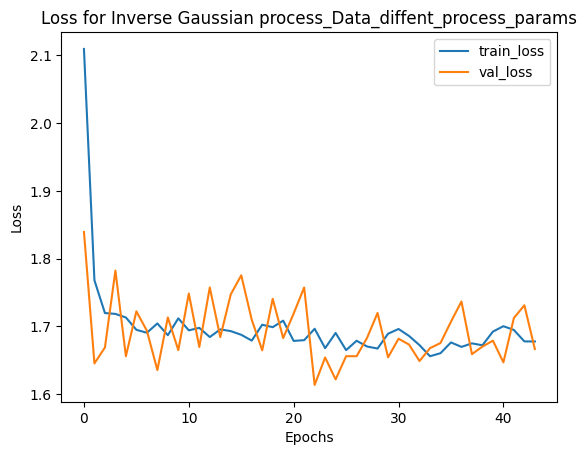

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.2778 - val_loss: 1.6241
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5525 - val_loss: 1.5543
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5672 - val_loss: 1.6261
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5480 - val_loss: 1.5450
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5719 - val_loss: 1.5519
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5417 - val_loss: 1.5409
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5692 - val_loss: 1.5810
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5428 - val_loss: 1.5267
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5274 - val_loss: 1.5559
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5463 - val_loss: 1.5194
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5346 - val_loss: 1.5542
Epoch 12/100
700/70

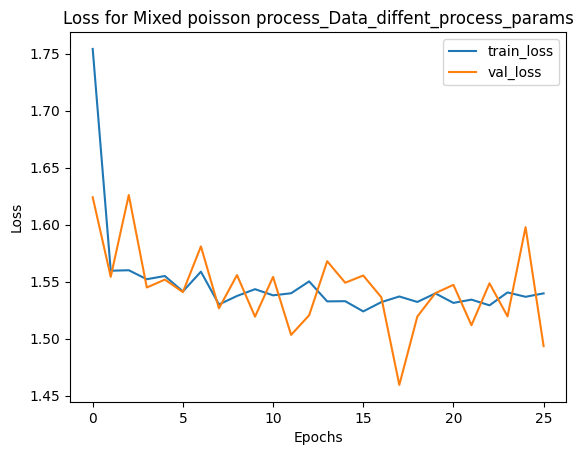

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 2.8007 - val_loss: 1.5742
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5933 - val_loss: 1.6010
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5610 - val_loss: 1.5762
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5597 - val_loss: 1.5769
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5837 - val_loss: 1.6099
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5345 - val_loss: 1.5453
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5540 - val_loss: 1.5582
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5687 - val_loss: 1.5507
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5822 - val_loss: 1.5398
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5455 - val_loss: 1.5804
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5713 - val_loss: 1.5651
Epoch 12/100
700/70

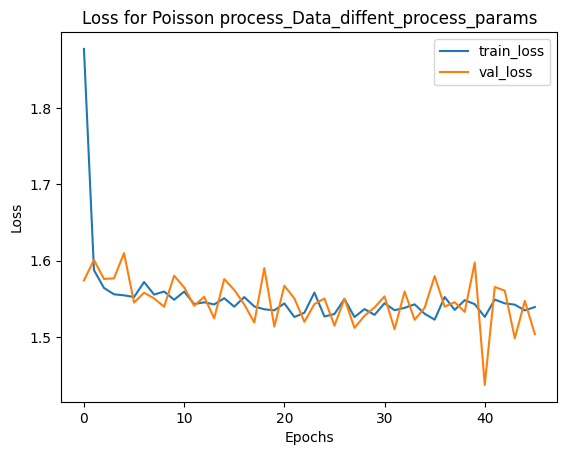

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.9950 - val_loss: 1.4287
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4670 - val_loss: 1.3755
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3992 - val_loss: 1.4575
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3892 - val_loss: 1.4350
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4004 - val_loss: 1.3905
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3532 - val_loss: 1.3358
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3399 - val_loss: 1.3406
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3565 - val_loss: 1.3116
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3237 - val_loss: 1.3161
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3629 - val_loss: 1.3802
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3399 - val_loss: 1.3630
Epoch 12/100
700/70

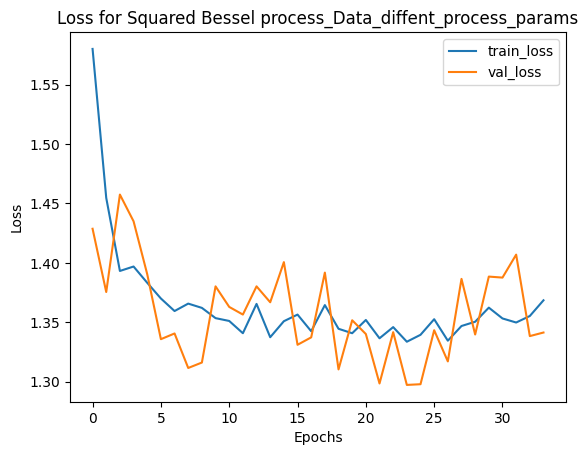

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.4042 - val_loss: 1.3835
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4223 - val_loss: 1.4552
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4065 - val_loss: 1.3916
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4217 - val_loss: 1.4117
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3857 - val_loss: 1.3821
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3890 - val_loss: 1.3959
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3898 - val_loss: 1.3712
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3758 - val_loss: 1.3633
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3776 - val_loss: 1.3610
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4007 - val_loss: 1.3511
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3901 - val_loss: 1.3792
Epoch 12/100
700/70

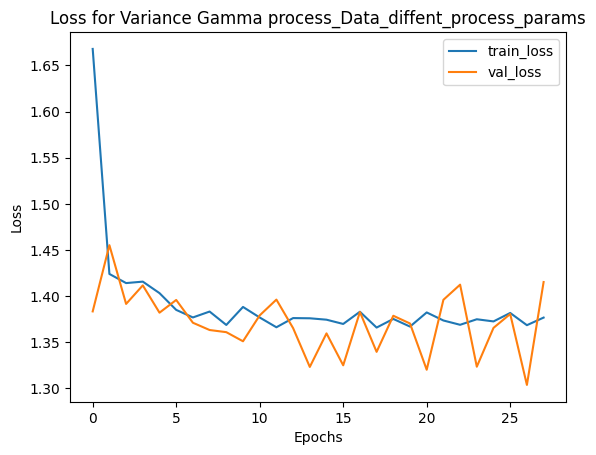

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.3125 - val_loss: 1.2730
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2864 - val_loss: 1.3099
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2267 - val_loss: 1.2198
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2309 - val_loss: 1.2260
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2287 - val_loss: 1.1920
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2369 - val_loss: 1.2415
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2068 - val_loss: 1.2249
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2143 - val_loss: 1.2325
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2417 - val_loss: 1.2321
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2370 - val_loss: 1.2422
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2335 - val_loss: 1.1662
Epoch 12/100
700/70

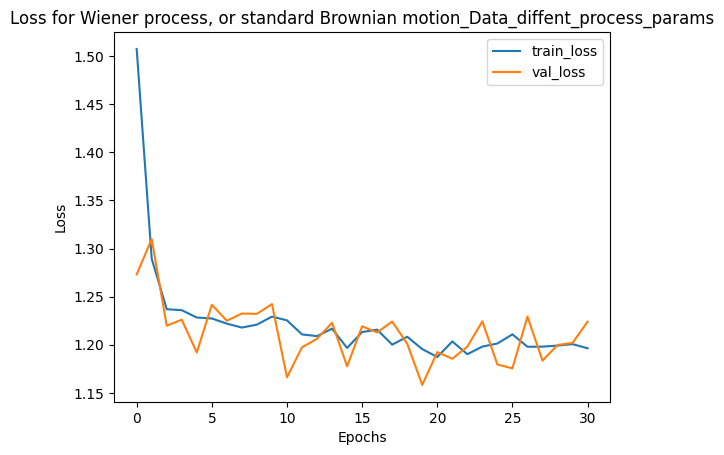

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.3363 - val_loss: 1.0491
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0444 - val_loss: 1.0515
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0135 - val_loss: 1.0022
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9908 - val_loss: 1.0267
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9781 - val_loss: 1.0304
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0006 - val_loss: 1.0122
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0063 - val_loss: 0.9944
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9914 - val_loss: 0.9839
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0042 - val_loss: 0.9948
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0014 - val_loss: 0.9832
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9921 - val_loss: 0.9506
Epoch 12/100
700/70

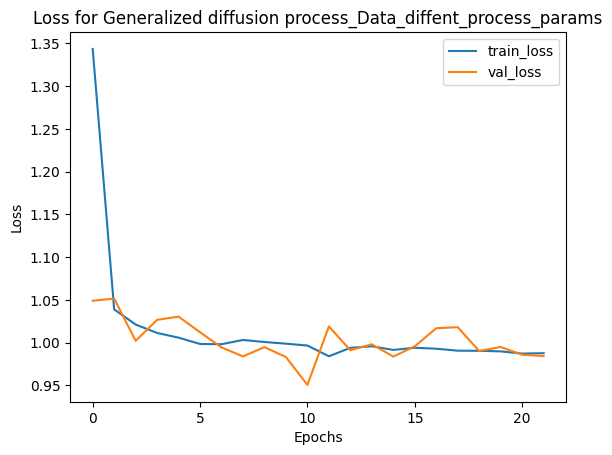

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 2.1157 - val_loss: 1.2633
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2794 - val_loss: 1.2189
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2408 - val_loss: 1.2182
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2378 - val_loss: 1.2015
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2106 - val_loss: 1.1794
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1736 - val_loss: 1.2546
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2224 - val_loss: 1.1886
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2055 - val_loss: 1.2295
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2131 - val_loss: 1.1988
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1985 - val_loss: 1.1820
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2055 - val_loss: 1.1752
Epoch 12/100
700/70

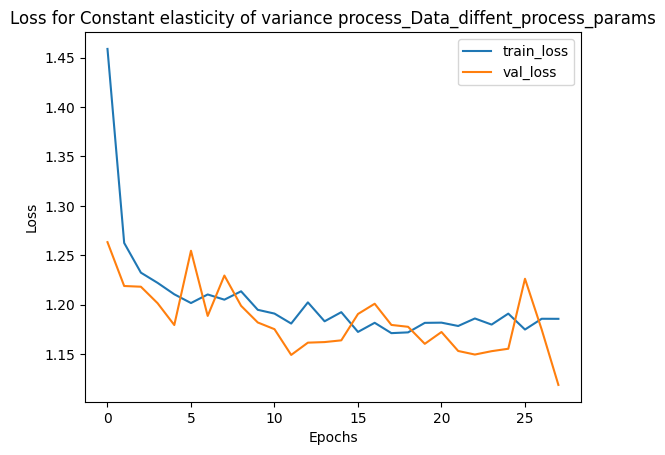

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.2049 - val_loss: 0.7364
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.8128 - val_loss: 0.8635
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.7402 - val_loss: 0.8327
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.7334 - val_loss: 0.6748
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.7022 - val_loss: 0.8922
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.7253 - val_loss: 0.6971
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.6173 - val_loss: 0.7757
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.7074 - val_loss: 0.6447
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.6680 - val_loss: 0.7154
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.6634 - val_loss: 0.6654
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.7175 - val_loss: 0.7428
Epoch 12/100
700/70

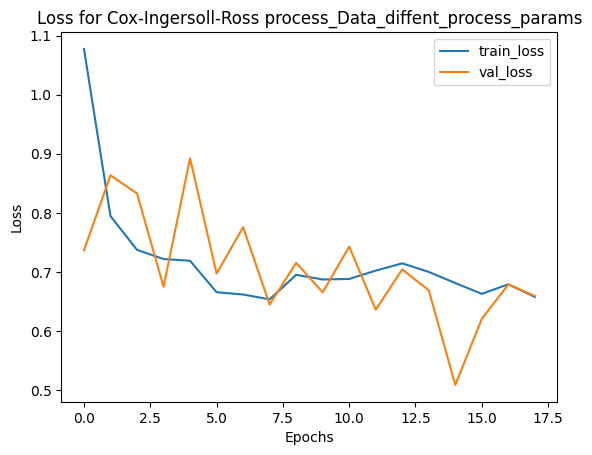

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.0567 - val_loss: 1.0511
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0992 - val_loss: 1.0942
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0511 - val_loss: 1.0184
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0336 - val_loss: 1.0463
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0332 - val_loss: 1.0159
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0208 - val_loss: 1.0273
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0126 - val_loss: 1.0576
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0460 - val_loss: 1.0055
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0118 - val_loss: 1.0267
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0345 - val_loss: 1.0575
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0178 - val_loss: 1.0536
Epoch 12/100
700/70

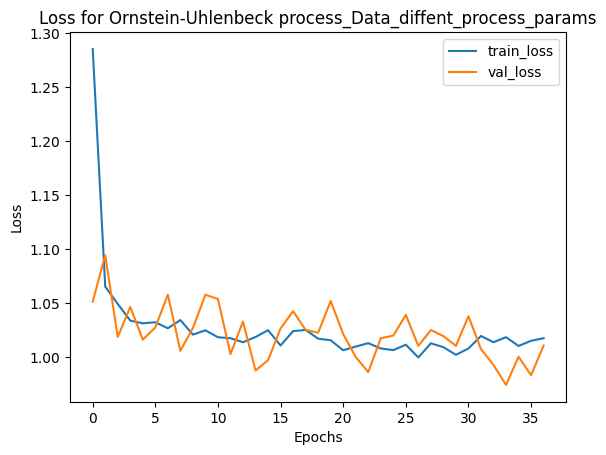

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1.8649 - val_loss: 1.1029
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1062 - val_loss: 1.0965
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0876 - val_loss: 1.0821
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0656 - val_loss: 1.1308
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0645 - val_loss: 1.0925
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0496 - val_loss: 1.0480
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0615 - val_loss: 1.0755
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0615 - val_loss: 1.0870
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0693 - val_loss: 1.0747
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0497 - val_loss: 1.0388
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0539 - val_loss: 1.0547
Epoch 12/100
700/70

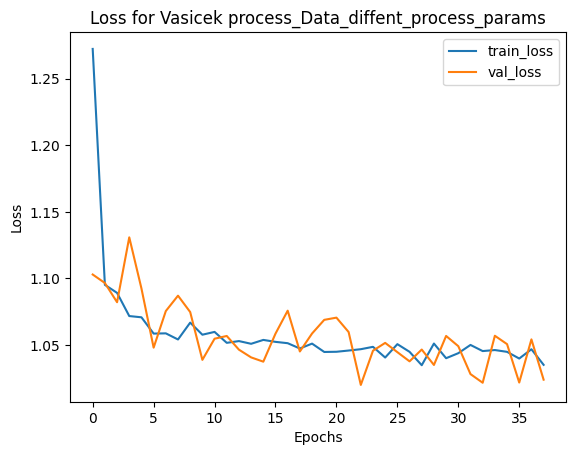

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 1.8059 - val_loss: 0.4362
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4405 - val_loss: 0.4701
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4378 - val_loss: 0.4290
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4321 - val_loss: 0.4286
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4275 - val_loss: 0.4280
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4362 - val_loss: 0.4302
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4259 - val_loss: 0.4323
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4319 - val_loss: 0.4252
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4272 - val_loss: 0.4225
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4279 - val_loss: 0.4240
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4271 - val_loss: 0.4313
Epoch 12/100
700/70

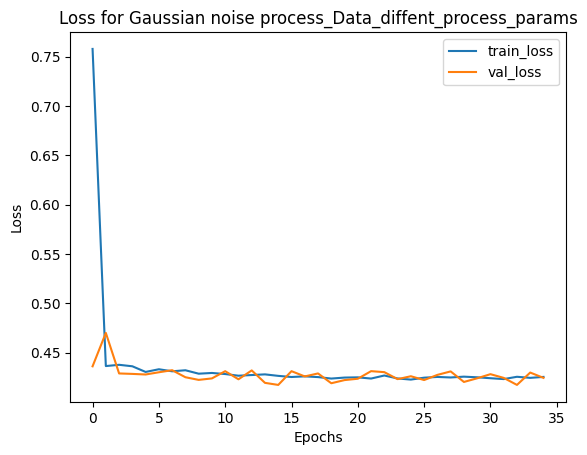

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.1264 - val_loss: 0.4441
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4595 - val_loss: 0.4353
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4458 - val_loss: 0.4516
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4460 - val_loss: 0.4450
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4453 - val_loss: 0.4464
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4475 - val_loss: 0.4415
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4401 - val_loss: 0.4442
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4431 - val_loss: 0.4346
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4452 - val_loss: 0.4350
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4444 - val_loss: 0.4342
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4385 - val_loss: 0.4407
Epoch 12/100
700/70

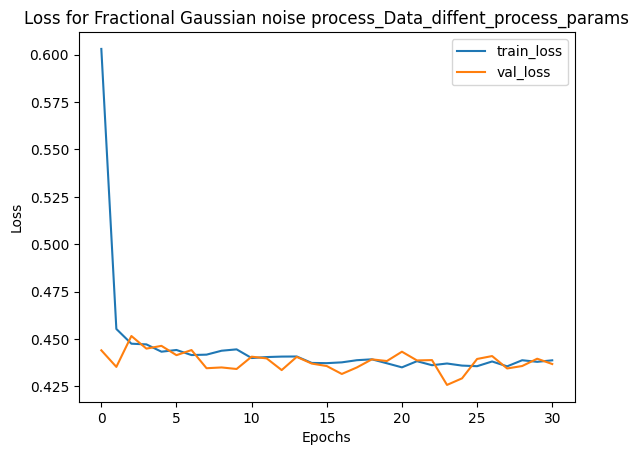

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.8100 - val_loss: 0.4150
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4310 - val_loss: 0.4624
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4309 - val_loss: 0.4362
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4310 - val_loss: 0.4370
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4315 - val_loss: 0.4470
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4308 - val_loss: 0.4191
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4279 - val_loss: 0.4210
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4260 - val_loss: 0.4255
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4257 - val_loss: 0.4236
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4257 - val_loss: 0.4177
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4257 - val_loss: 0.4256
Epoch 12/100
700/70

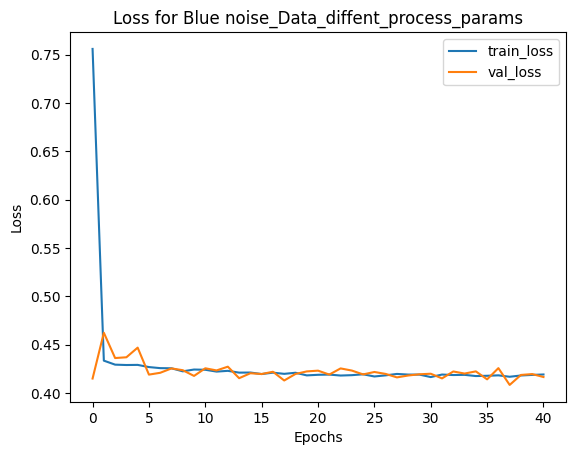

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.5759 - val_loss: 1.1259
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1114 - val_loss: 1.0677
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1012 - val_loss: 1.0473
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0877 - val_loss: 1.0848
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1017 - val_loss: 1.0752
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0756 - val_loss: 1.0832
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0859 - val_loss: 1.1597
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0884 - val_loss: 1.0779
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0641 - val_loss: 1.0962
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0866 - val_loss: 1.0931
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0567 - val_loss: 1.1030
Epoch 12/100
700/70

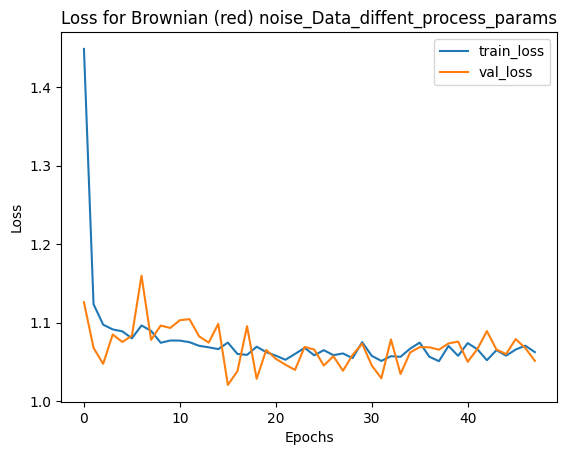

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.9184 - val_loss: 0.4490
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4578 - val_loss: 0.4462
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4487 - val_loss: 0.4418
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4500 - val_loss: 0.4453
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4497 - val_loss: 0.4868
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4444 - val_loss: 0.4428
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4467 - val_loss: 0.4501
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4464 - val_loss: 0.4368
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4430 - val_loss: 0.4399
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4456 - val_loss: 0.4452
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4466 - val_loss: 0.4360
Epoch 12/100
700/70

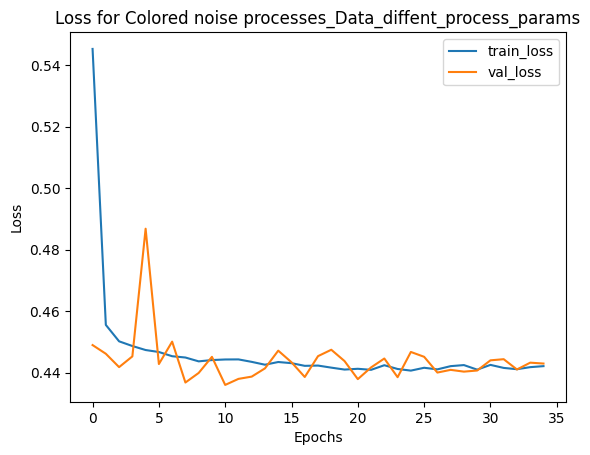

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.3925 - val_loss: 1.0154
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0302 - val_loss: 1.0296
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0235 - val_loss: 1.0099
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0286 - val_loss: 1.0107
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0167 - val_loss: 1.0335
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0074 - val_loss: 1.0013
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0189 - val_loss: 1.0390
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0252 - val_loss: 1.0042
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0080 - val_loss: 0.9769
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9854 - val_loss: 1.0307
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0194 - val_loss: 1.0254
Epoch 12/100
700/70

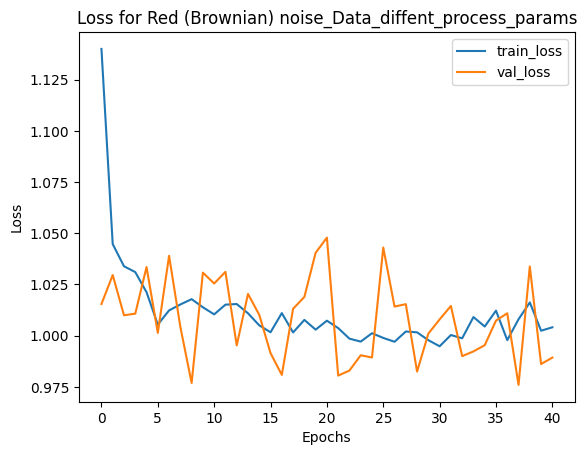

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 1.1505 - val_loss: 0.5556
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5394 - val_loss: 0.5415
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5334 - val_loss: 0.5322
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5346 - val_loss: 0.5588
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5329 - val_loss: 0.5337
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5314 - val_loss: 0.5301
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5282 - val_loss: 0.5283
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5240 - val_loss: 0.5342
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5308 - val_loss: 0.5165
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.5280 - val_loss: 0.5280
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5303 - val_loss: 0.5360
Epoch 12/100
700/70

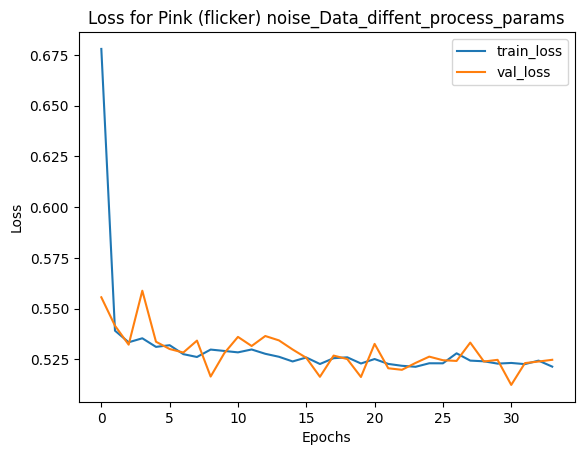

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.9751 - val_loss: 0.4205
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4373 - val_loss: 0.4300
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4286 - val_loss: 0.4304
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4280 - val_loss: 0.4492
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4294 - val_loss: 0.4253
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4284 - val_loss: 0.4482
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4229 - val_loss: 0.4226
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4237 - val_loss: 0.4188
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4189 - val_loss: 0.4135
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4219 - val_loss: 0.4235
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4178 - val_loss: 0.4159
Epoch 12/100
700/70

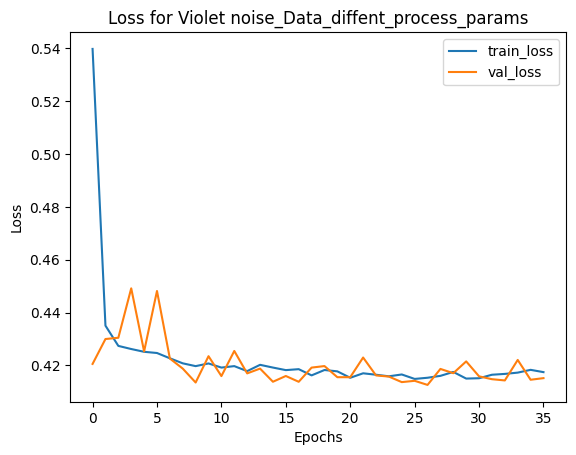

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.1505 - val_loss: 0.5032
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4848 - val_loss: 0.4571
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4804 - val_loss: 0.4660
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4685 - val_loss: 0.4660
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4717 - val_loss: 0.4632
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4736 - val_loss: 0.4670
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4726 - val_loss: 0.4760
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4658 - val_loss: 0.4759
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4614 - val_loss: 0.4618
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4673 - val_loss: 0.4747
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4638 - val_loss: 0.4709
Epoch 12/100
700/70

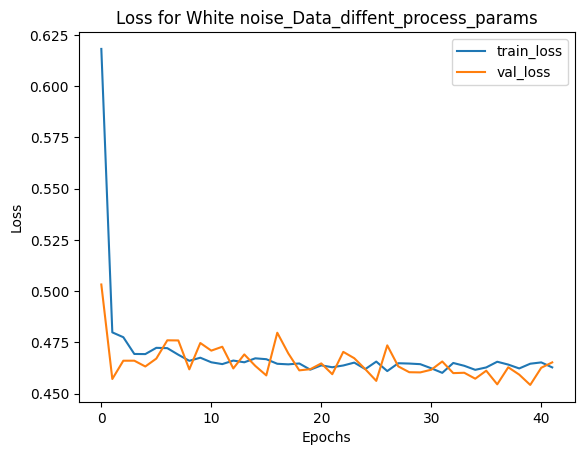

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 2.7242 - val_loss: 1.1881
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2568 - val_loss: 1.2378
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2359 - val_loss: 1.2207
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2056 - val_loss: 1.1908
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1910 - val_loss: 1.1728
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1796 - val_loss: 1.2189
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1755 - val_loss: 1.1993
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1755 - val_loss: 1.1848
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1786 - val_loss: 1.2307
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1735 - val_loss: 1.1492
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1834 - val_loss: 1.1734
Epoch 12/100
700/70

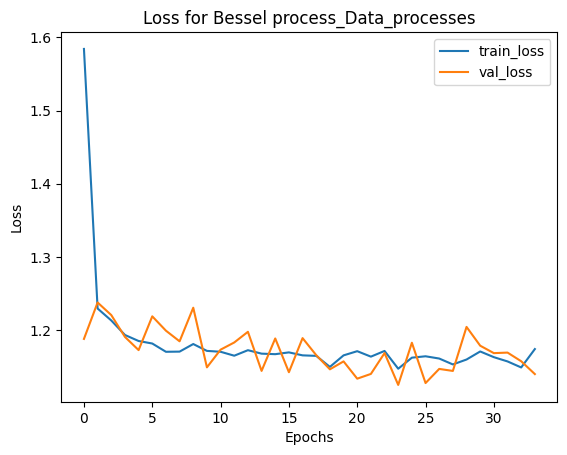

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.8488 - val_loss: 1.1708
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2098 - val_loss: 1.1094
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1465 - val_loss: 1.1068
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1468 - val_loss: 1.1306
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1277 - val_loss: 1.0943
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1202 - val_loss: 1.1069
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1210 - val_loss: 1.0796
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1016 - val_loss: 1.0924
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1090 - val_loss: 1.1254
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0987 - val_loss: 1.0807
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1113 - val_loss: 1.1027
Epoch 12/100
700/70

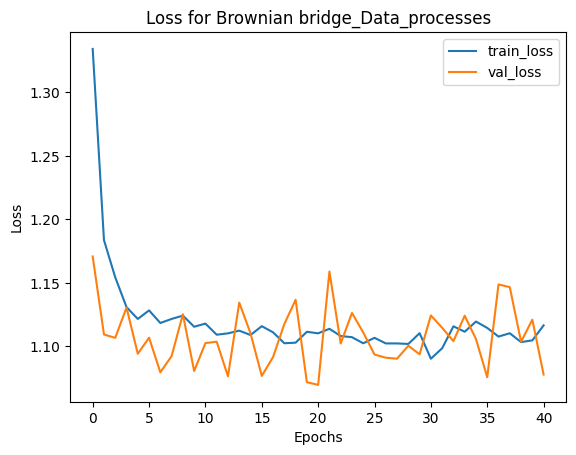

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.8241 - val_loss: 1.0776
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1169 - val_loss: 1.0442
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1041 - val_loss: 1.0700
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0806 - val_loss: 1.0741
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0668 - val_loss: 1.1490
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0778 - val_loss: 1.0672
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0631 - val_loss: 1.0564
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0669 - val_loss: 1.0627
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0619 - val_loss: 1.0475
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0570 - val_loss: 1.0489
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0602 - val_loss: 1.0771
Epoch 12/100
700/70

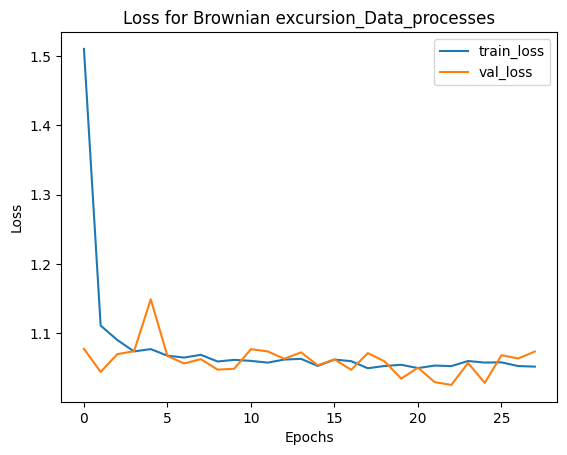

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 1.6925 - val_loss: 1.2068
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2609 - val_loss: 1.2190
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2068 - val_loss: 1.2531
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2014 - val_loss: 1.1647
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2033 - val_loss: 1.2417
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1899 - val_loss: 1.1667
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2081 - val_loss: 1.2048
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1789 - val_loss: 1.1918
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1790 - val_loss: 1.2047
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1766 - val_loss: 1.2246
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2064 - val_loss: 1.1619
Epoch 12/100
700/70

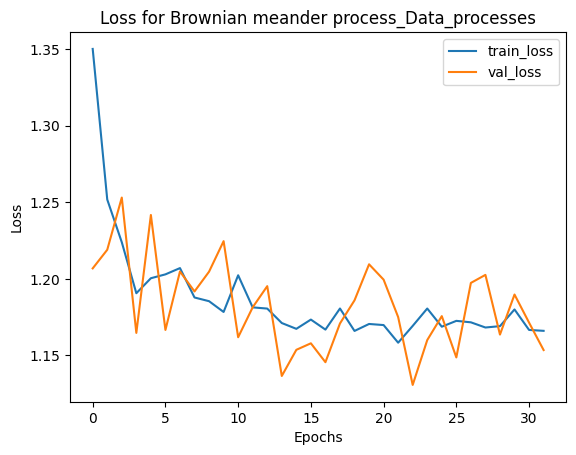

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.3981 - val_loss: 1.0975
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0687 - val_loss: 1.0406
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0234 - val_loss: 1.0582
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0186 - val_loss: 0.9929
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0139 - val_loss: 1.0031
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0142 - val_loss: 0.9760
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0124 - val_loss: 0.9774
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0003 - val_loss: 1.0069
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0166 - val_loss: 0.9942
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0207 - val_loss: 1.0516
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9817 - val_loss: 1.0155
Epoch 12/100
700/70

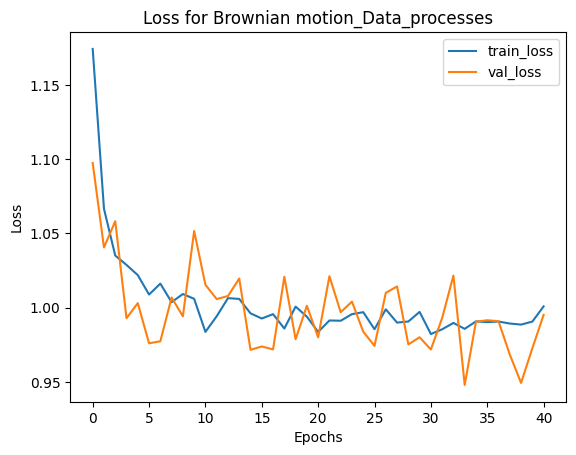

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 1.9574 - val_loss: 1.6427
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5591 - val_loss: 1.4030
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4389 - val_loss: 1.5076
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4458 - val_loss: 1.5102
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4237 - val_loss: 1.4514
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4710 - val_loss: 1.4017
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4472 - val_loss: 1.4073
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4326 - val_loss: 1.3821
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4052 - val_loss: 1.4007
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4317 - val_loss: 1.4124
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4128 - val_loss: 1.4021
Epoch 12/100
700/70

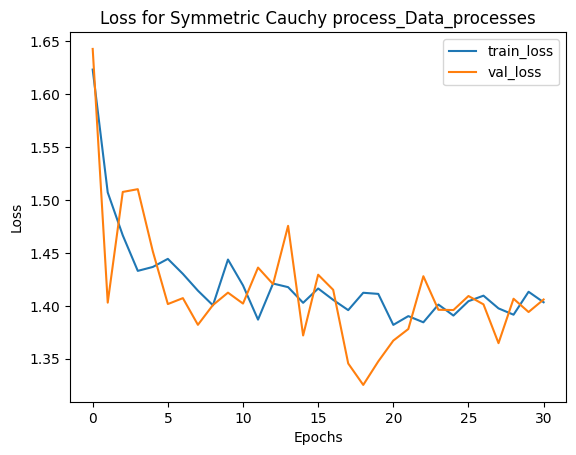

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.6456 - val_loss: 1.0837
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1200 - val_loss: 1.1501
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1153 - val_loss: 1.1307
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0855 - val_loss: 1.0901
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0805 - val_loss: 1.0625
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0715 - val_loss: 1.0560
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0829 - val_loss: 1.1055
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0764 - val_loss: 1.1025
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0872 - val_loss: 1.1121
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0801 - val_loss: 1.1086
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0487 - val_loss: 1.0356
Epoch 12/100
700/70

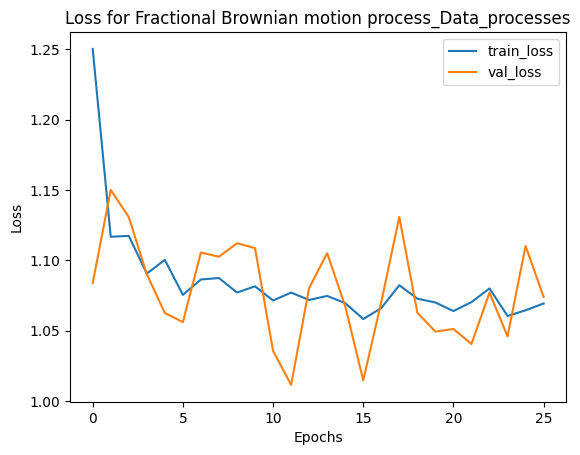

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.9314 - val_loss: 1.7062
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5878 - val_loss: 1.5903
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5480 - val_loss: 1.5416
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5501 - val_loss: 1.5612
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4991 - val_loss: 1.5454
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5288 - val_loss: 1.5683
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5383 - val_loss: 1.5468
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5093 - val_loss: 1.5338
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4905 - val_loss: 1.4535
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5238 - val_loss: 1.5117
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5261 - val_loss: 1.5352
Epoch 12/100
700/70

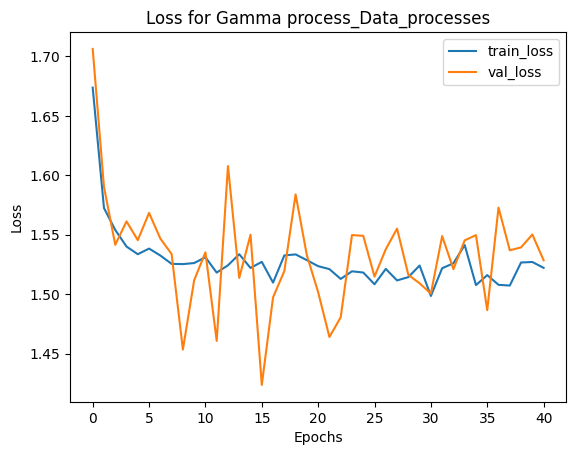

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.4716 - val_loss: 1.1570
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1553 - val_loss: 1.1064
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1422 - val_loss: 1.0636
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0911 - val_loss: 1.1111
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0972 - val_loss: 1.0808
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1079 - val_loss: 1.0851
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0918 - val_loss: 1.0819
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0948 - val_loss: 1.0831
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1159 - val_loss: 1.0913
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1032 - val_loss: 1.0719
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0605 - val_loss: 1.0634
Epoch 12/100
700/70

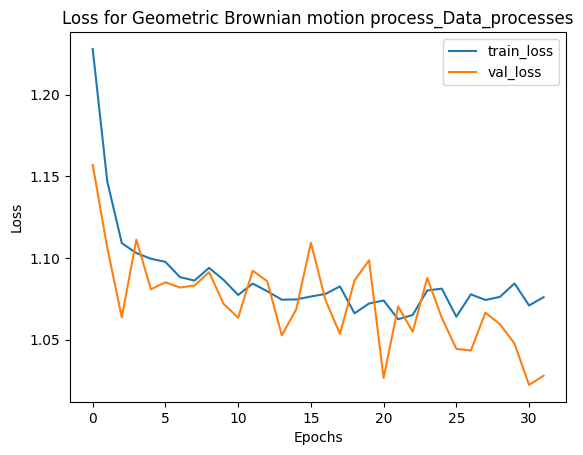

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 3.1602 - val_loss: 2.0072
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 2.0373 - val_loss: 2.0134
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 2.0134 - val_loss: 2.0259
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 2.0071 - val_loss: 1.9441
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9500 - val_loss: 1.9427
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.9763 - val_loss: 2.0093
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.9303 - val_loss: 1.9605
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.9839 - val_loss: 1.9602
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9460 - val_loss: 1.9426
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9532 - val_loss: 1.9941
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9659 - val_loss: 1.9460
Epoch 12/100
700/70

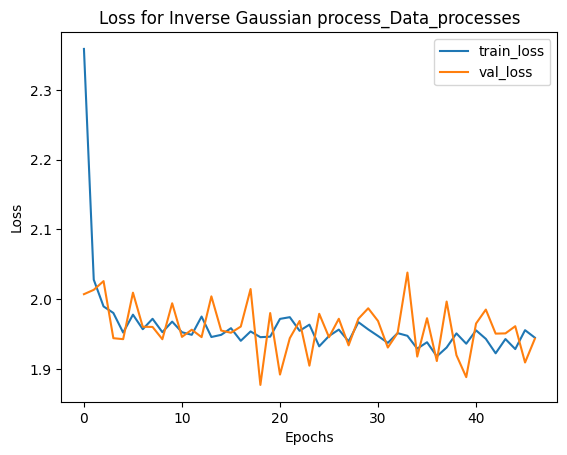

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 2.3641 - val_loss: 1.5933
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5712 - val_loss: 1.5306
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5526 - val_loss: 1.5715
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5556 - val_loss: 1.5865
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5499 - val_loss: 1.5504
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5424 - val_loss: 1.5510
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5646 - val_loss: 1.5616
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5653 - val_loss: 1.5021
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5396 - val_loss: 1.5278
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5429 - val_loss: 1.5679
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5482 - val_loss: 1.5151
Epoch 12/100
700/70

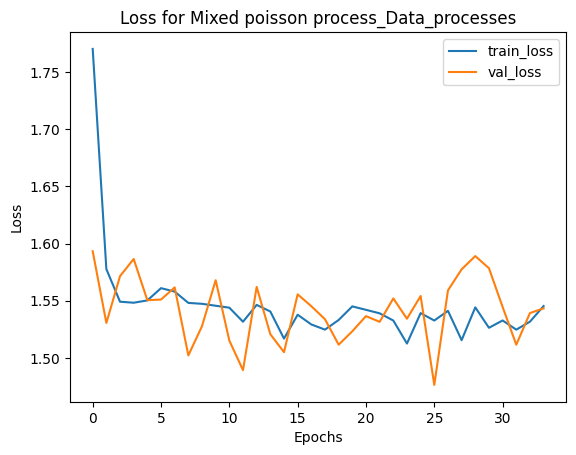

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 1.9420 - val_loss: 1.5593
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5598 - val_loss: 1.4721
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5341 - val_loss: 1.5481
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5507 - val_loss: 1.5244
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5589 - val_loss: 1.4972
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5318 - val_loss: 1.4907
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5045 - val_loss: 1.5400
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5409 - val_loss: 1.5097
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5493 - val_loss: 1.4822
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5535 - val_loss: 1.5435
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5219 - val_loss: 1.5542
Epoch 12/100
700/70

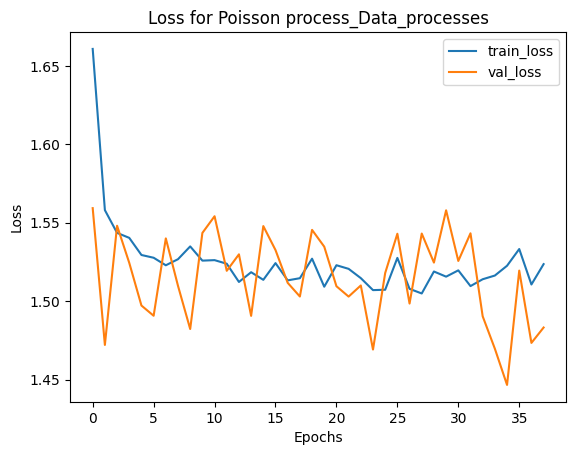

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.6370 - val_loss: 1.5642
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.5399 - val_loss: 1.4735
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4859 - val_loss: 1.4721
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4641 - val_loss: 1.4490
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4854 - val_loss: 1.4543
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4469 - val_loss: 1.4139
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4861 - val_loss: 1.5198
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4655 - val_loss: 1.4075
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4672 - val_loss: 1.4489
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4657 - val_loss: 1.4608
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4769 - val_loss: 1.4262
Epoch 12/100
700/70

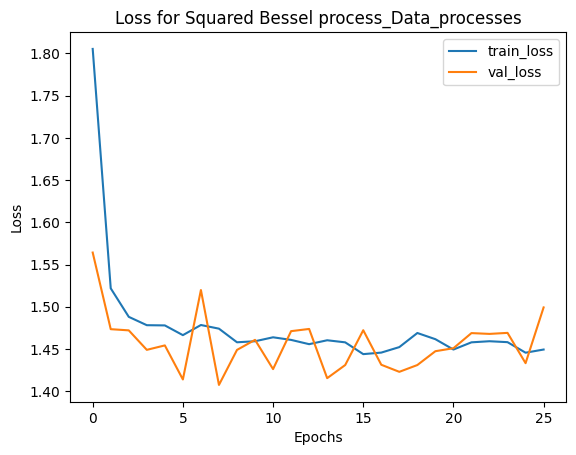

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.7226 - val_loss: 1.3850
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4287 - val_loss: 1.4217
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.4162 - val_loss: 1.3969
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3897 - val_loss: 1.3727
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3814 - val_loss: 1.3950
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3910 - val_loss: 1.3151
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3704 - val_loss: 1.3974
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3786 - val_loss: 1.3485
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3661 - val_loss: 1.4240
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3680 - val_loss: 1.3585
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3590 - val_loss: 1.3985
Epoch 12/100
700/70

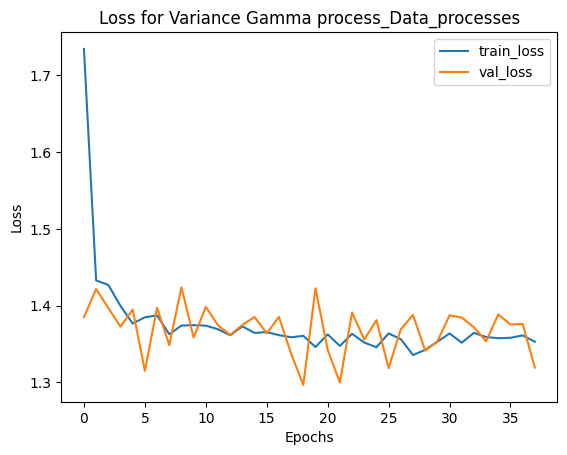

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.4569 - val_loss: 1.0147
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0504 - val_loss: 0.9828
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0056 - val_loss: 1.0320
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0132 - val_loss: 1.0053
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9899 - val_loss: 0.9893
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9583 - val_loss: 0.9468
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.9816 - val_loss: 0.9688
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9676 - val_loss: 0.9351
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.9926 - val_loss: 0.9502
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 1.0051 - val_loss: 0.9894
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9757 - val_loss: 0.9361
Epoch 12/100
700/70

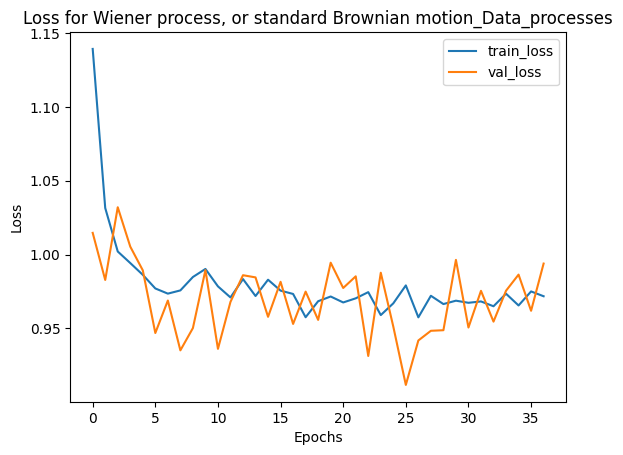

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.6224 - val_loss: 0.9947
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.9829 - val_loss: 0.9152
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9492 - val_loss: 1.0019
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.9449 - val_loss: 0.9032
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9208 - val_loss: 0.9213
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9439 - val_loss: 0.9642
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9231 - val_loss: 0.9539
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9337 - val_loss: 0.8833
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9374 - val_loss: 0.8976
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9329 - val_loss: 0.9076
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9304 - val_loss: 0.9342
Epoch 12/100
700/70

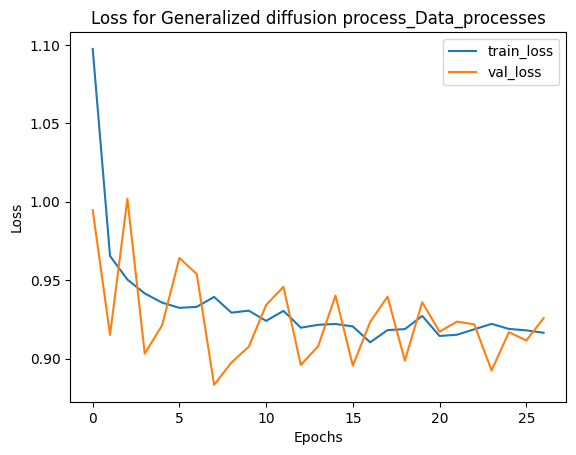

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 2.5694 - val_loss: 1.2947
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.3226 - val_loss: 1.3210
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2909 - val_loss: 1.2005
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 1.2342 - val_loss: 1.1588
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2772 - val_loss: 1.3102
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2074 - val_loss: 1.2429
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.1990 - val_loss: 1.1711
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2426 - val_loss: 1.2174
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2267 - val_loss: 1.2339
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2229 - val_loss: 1.2166
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.2421 - val_loss: 1.2327
Epoch 12/100
700/70

2025-06-04 23:23:03.889308: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:542: Filling up shuffle buffer (this may take a while): 162 of 1000
2025-06-04 23:23:19.654797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:542: Filling up shuffle buffer (this may take a while): 202 of 1000
2025-06-04 23:23:50.157457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:542: Filling up shuffle buffer (this may take a while): 277 of 1000
2025-06-04 23:24:06.944527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:542: Filling up shuffle buffer (this may take a while): 334 of 1000
2025-06-04 23:24:25.672939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:542: Filling up shuffle buffer (this may take a while): 352 of 1000
2025-06-04 23:24:38.138457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:542: Filling up shuffle buffer (this may t

In [ ]:
for file in tdms_files:
    train_lots_models(
        tdms_file = os.path.join(N_drive, file),
        Git_Folder = Git_Folder,
        dataset_folder = dataset_folder
    )

In [1]:
import os
from Transformer_model import *
N_drive = '/mnt/n/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ'
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
dataset_folder = os.path.join(N_drive, 'ML_datasets')
tdms_files = ['Data_diffent_process_params_2025_06_03.tdms','Data_processes_2025_06_03.tdms']


2025-06-05 20:19:25.201002: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-05 20:19:25.209601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749147565.219038 2412319 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749147565.221668 2412319 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749147565.228520 2412319 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
dataset_folder = os.path.join(N_drive, 'ML_datasets')
datasets = os.listdir(dataset_folder)
trainsets = [x for x in datasets if x.startswith("train")]
valsets = [x for x in datasets if x.startswith("val")]
# testsets = [x for x in datasets if x.startswith("test")]
names = [x.removeprefix("val_").removesuffix("_2025_06_03") for x in valsets]

In [3]:
TESTtrainsets = [x for x in datasets if x.startswith("many_train_Or")][1]
TESTvalsets = [x for x in datasets if x.startswith("many_val_Or")][1]


In [ ]:
"\\unicph.domain\groupdir\SCI-NBI-quantop-data\data\gwd\Experimental Data\atoms\2025\2025-05-28 - Chistian Jun ML DAQ\ML_datasets\Ornstein-Uhlenbeck process_Data_diffent_process_params"

In [ ]:
train_model(        
        train_dataset = tf.data.Dataset.load(
            os.path.join(dataset_folder, TESTtrainsets)
        ),
        val_dataset = tf.data.Dataset.load(
            os.path.join(dataset_folder, TESTvalsets)
        ),
        initial_learning_rate=1e-4,
        target_learning_rate=1e-5,
        warmup_steps=2100,
        decay_steps=2100,
        batch_size=10,
        transformer = def_model(
            EMBED_DIM = 512,          # Projection dimension for time-series features
            INTERMEDIATE_DIM = 256, #128  # Transformer feedforward dimension
            NUM_HEADS = 4  
        )
    )

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 147s 201ms/step - loss: 1.5203
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 141s 202ms/step - loss: 1.0992
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 136s 195ms/step - loss: 1.0964
Epoch 4/100
151/700 ━━━━━━━━━━━━━━━━━━━━ 1:46 194ms/step - loss: 1.0830

Epoch 1/100


I0000 00:00:1749115323.233516 2307744 service.cc:152] XLA service 0x7f7dec037890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749115323.233559 2307744 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-05 11:22:03.369680: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749115324.067520 2307744 cuda_dnn.cc:529] Loaded cuDNN version 90300


   32/70000 ━━━━━━━━━━━━━━━━━━━━ 5:58 5ms/step - loss: 9.8311 

I0000 00:00:1749115326.986952 2307744 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69989/70000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1749

2025-06-05 11:27:39.004396: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27', 12 bytes spill stores, 12 bytes spill loads



70000/70000 ━━━━━━━━━━━━━━━━━━━━ 430s 6ms/step - loss: 1.1749 - val_loss: 1.0056
Epoch 2/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 402s 6ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 3/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 380s 5ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 4/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 382s 5ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 5/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 379s 5ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 6/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 386s 6ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 7/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 384s 5ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 8/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 381s 5ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 9/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 377s 5ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 10/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 393s 6ms/step - loss: 1.1284 - val_loss: 1.0056
Epoch 11/100
70000/70000 ━━━━━━━━━━━━━━━━━━━━ 386s 6ms/step - loss: 1.1284 - val_

FileNotFoundError: [Errno 2] No such file or directory: '/home/qopt/Christian/Bachelors-Project---Christian-Lorentsen/Python/Atomspc/Transformer_models/Training_hist/loss_hist_LongOU.svg'

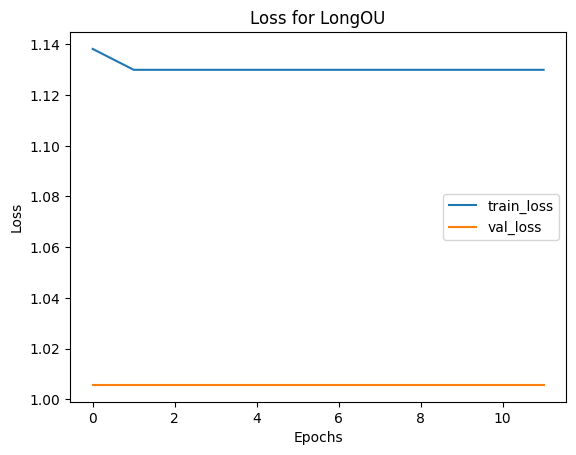

In [ ]:
for i in range(len(trainsets)):
    train_model(
        train_dataset = tf.data.Dataset.load(
            os.path.join(dataset_folder, trainsets[i])
        ),
        val_dataset = tf.data.Dataset.load(
            os.path.join(dataset_folder, valsets[i])
        ),
        save_path = os.path.join(Git_Folder, "Python", 'Atomspc', "Transformer_models", f"model_{names[i]}.keras"),
        pickle_path = os.path.join(dataset_folder, f"history_{names[i]}.pkl"),
        plt_path = os.path.join(Git_Folder, "Python", 'Atomspc', "Training_hist", f"loss_hist_{names[i]}.svg"),
        type_model = names[i] 
    )

In [ ]:
# train_lots_models(tdms_file, Git_Folder, dataset_folder)